##### **Name - Surname:** Ramazan Serhat Uygun
##### **Number:** 201401049

# **Question 1**

___

## **Decision Tree Classification**

## Required Libraries

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

## Loading the Data Set and Initial Exploration

In [30]:
file_path = "Breast_Cancer.csv"
data = pd.read_csv(file_path)

print("First 5 Rows of the Data Set:")
print("------------------------------")
print(data.head())
print("--------------------------------------------------------------------------------------")
print("\nGeneral Information of the Data Set:")
print("---------------------------------------")
print(data.info())
print("--------------------------------------------------------------------------------------")

print("\nNumber of Missing Values:")
print("----------------------------")
print(data.isnull().sum())
print("--------------------------------------------------------------------------------------")

print("\nTarget Variable (Status) Class Distribution:")
print("---------------------------------------------------")
print(data['Status'].value_counts())

First 5 Rows of the Data Set:
------------------------------
   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24          

In [32]:
def bar_chart(feature):
    survived = data[data['Status'] == 'Alive'][feature].value_counts()
    dead = data[data['Status'] == 'Dead'][feature].value_counts()
    datadf = pd.DataFrame([survived, dead])
    datadf.index = ['Alive', 'Dead']
    datadf.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

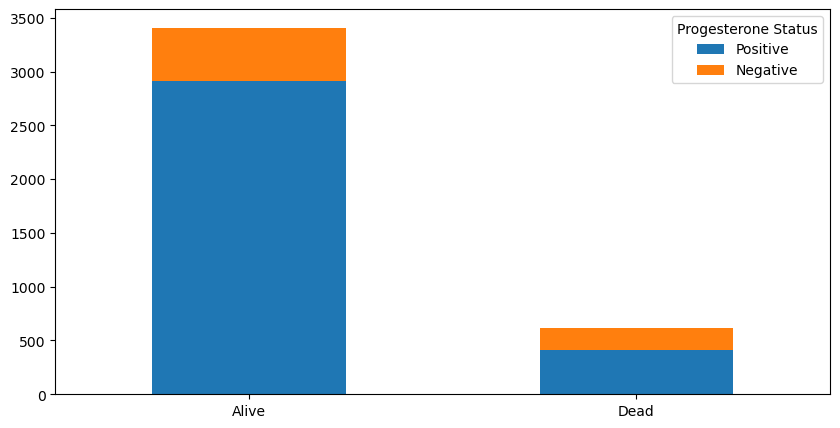

In [34]:
bar_chart('Progesterone Status')

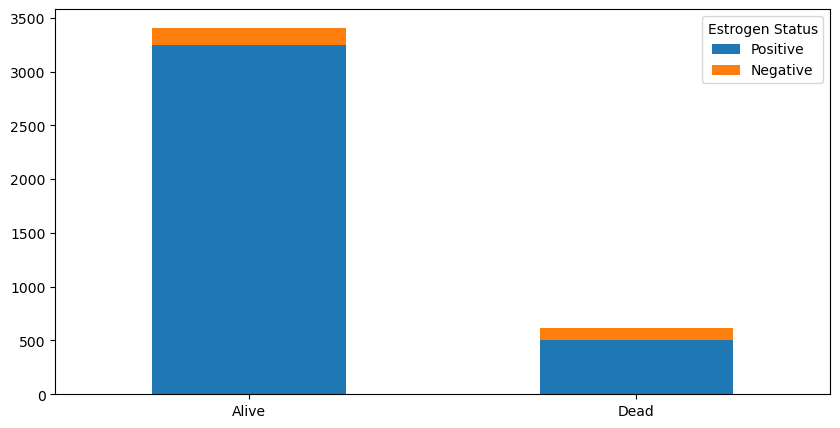

In [36]:
bar_chart('Estrogen Status')

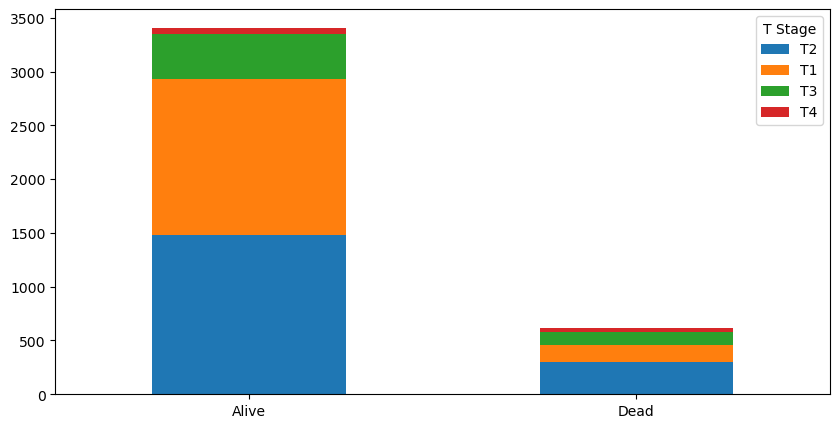

In [38]:
data['T Stage']=data['T Stage ']
data.drop(columns='T Stage ', inplace=True)
bar_chart('T Stage')

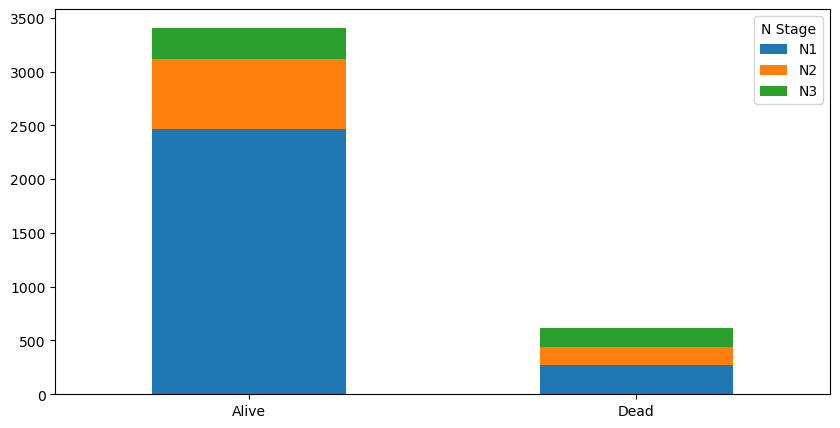

In [40]:
bar_chart('N Stage')

<Axes: xlabel='Status', ylabel='count'>

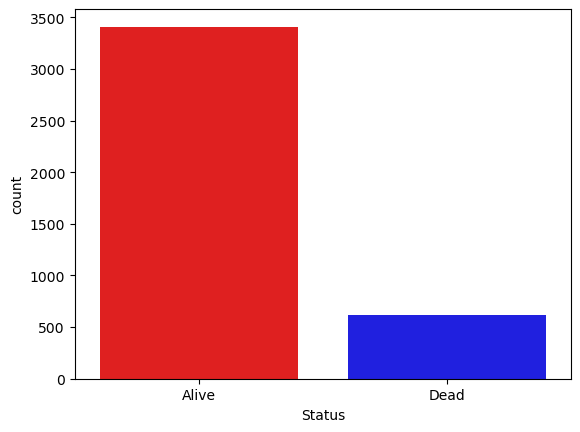

In [42]:
sns.countplot(x='Status', data=data, hue='Status', palette=['r', 'b'])

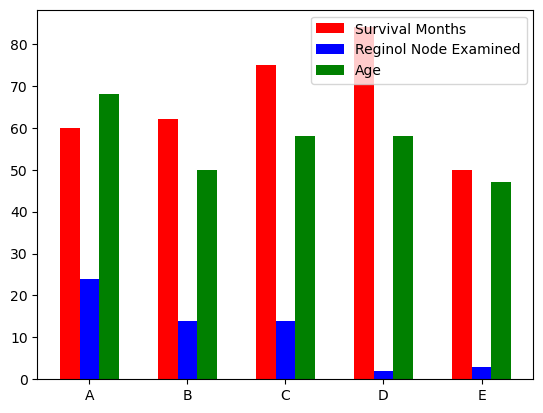

In [44]:
b1 = data['Survival Months'].head()
b2 = data['Regional Node Examined'].head()
b3 = data['Age'].head()

plt.subplots()
index = np.arange(5)
width = 0.2


plt.bar(index, b1, width, color='r', label='Survival Months')
plt.bar(index+width, b2, width, color='b', label='Reginol Node Examined')
plt.bar(index+2*width, b3, width, color='g', label='Age')

plt.xticks(index+width, ['A', 'B', 'C', 'D', 'E'])
plt.legend();

## Data Preprocessing Steps

##### **1. Processing Incomplete Data**

In [50]:
print("Missing Value Numbers:")
print("----------------------------")
print(data.isnull().sum())

categorical_columns = ['Marital Status', 'Race', 'Estrogen Status', 'Progesterone Status']
for col in categorical_columns:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)  

numerical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']
for col in numerical_columns:
    median_value = data[col].median()  
    data[col] = data[col].fillna(median_value) 

Missing Value Numbers:
----------------------------
Age                       0
Race                      0
Marital Status            0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
T Stage                   0
dtype: int64


##### **2. Transforming Categorical Variables**

In [69]:
categorical_columns = ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 
'Estrogen Status', 'Progesterone Status', 'Status']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("First 5 rows of coded columns:")
print("-------------------------------")
print(data[categorical_columns].head())

First 5 rows of coded columns:
-------------------------------
   Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  Grade  \
0     2               1        0        0          0              1      3   
1     2               1        1        1          2              0      2   
2     2               0        2        2          4              0      2   
3     2               1        0        0          0              1      3   
4     2               1        1        0          1              1      3   

   A Stage  Estrogen Status  Progesterone Status  Status  
0        1                1                    1       0  
1        1                1                    1       0  
2        1                1                    1       0  
3        1                1                    1       0  
4        1                1                    1       0  


##### **3. Scaling of Numerical Variables**

In [72]:
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("First 5 rows of coded columns:")
print("-------------------------------")
print(data_scaled.head())

First 5 rows of coded columns:
-------------------------------
        Age  Race  Marital Status  N Stage  6th Stage  differentiate  Grade  \
0  1.565253     2               1        0          0              1      3   
1 -0.443222     2               1        1          2              0      2   
2  0.449434     2               0        2          4              0      2   
3  0.449434     2               1        0          0              1      3   
4 -0.777968     2               1        0          1              1      3   

   A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0        1   -1.253661                1                    1   
1        1    0.214345                1                    1   
2        1    1.540287                1                    1   
3        1   -0.590691                1                    1   
4        1    0.498475                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  \


##### **4. Splitting a Data Set**

In [75]:
X = data.drop('Status', axis=1)
y = data['Status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nExample 5 Rows from the Training Set (X_train):")
print("--------------------------------------------------")
print(X_train.head())
print("------------------------------------------------------------------------------")

print("\nTarget 5 Values from Training Set (y_train):")
print("-----------------------------------------------")
print(y_train.head())
print("------------------------------------------------------------------------------")

print("\nSample 5 Rows from Test Set (X_test):")
print("----------------------------------------")

print(X_test.head())
print("------------------------------------------------------------------------------")

print("\nTarget 5 Values from Test Set (y_test):")
print("------------------------------------------")
print(y_test.head())


Example 5 Rows from the Training Set (X_train):
--------------------------------------------------
      Age  Race  Marital Status  N Stage  6th Stage  differentiate  Grade  \
1909   50     2               1        0          1              3      1   
1635   59     2               1        0          0              1      3   
239    44     2               1        0          0              0      2   
898    59     2               0        1          2              0      2   
2679   69     2               1        0          0              3      1   

      A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
1909        1          40                1                    1   
1635        1          12                1                    1   
239         1          11                1                    1   
898         1          25                1                    0   
2679        1          18                1                    1   

      Regional Node Examined  Regi

## Training and Evaluating the Decision Tree Model

##### **1. Model Training:**
The model is created using **DecisionTreeClassifier** and trained with the training set.

In [79]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model.fit(X_train, y_train)

print("Decision Tree Model Trained!")

Decision Tree Model Trained!


##### **2. Evaluating Model Performance**
I will compute various evaluation metrics by making predictions of the model on the test set.

In [81]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance:")
print("-------------------")
print(f"- Accuracy: {accuracy:.2f}")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")
print(f"- F1 Score: {f1:.2f}")
print("------------------------------------------------------------------------------")

print("\nClassification Report:")
print("-------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------------------------------")

print("\nConfusion Matrix:")
print("----------------")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Model Performance:
-------------------
- Accuracy: 0.89
- Precision: 0.88
- Recall: 0.89
- F1 Score: 0.88
------------------------------------------------------------------------------

Classification Report:
-------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       682
           1       0.73      0.44      0.55       123

    accuracy                           0.89       805
   macro avg       0.82      0.70      0.74       805
weighted avg       0.88      0.89      0.88       805

------------------------------------------------------------------------------

Confusion Matrix:
----------------
[[662  20]
 [ 69  54]]


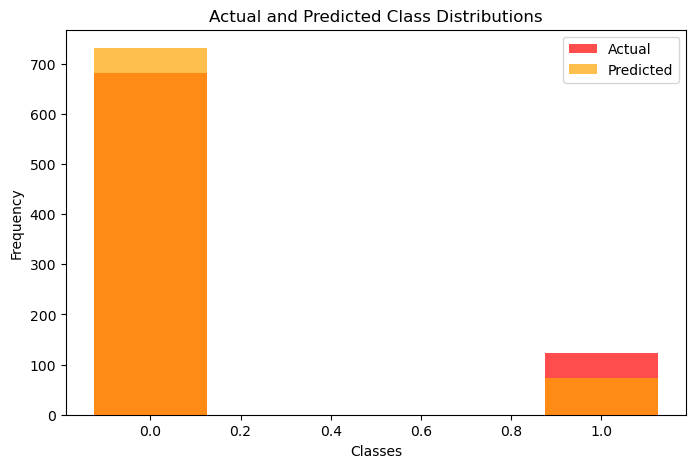

In [83]:
true_counts = y_test.value_counts()
pred_counts = pd.Series(y_pred).value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
width = 0.25
x = true_counts.index

ax.bar(x, true_counts, width, label="Actual", color="red", alpha=0.7)
ax.bar(x, pred_counts, width, label="Predicted", color="orange", alpha=0.7)

plt.title("Actual and Predicted Class Distributions")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

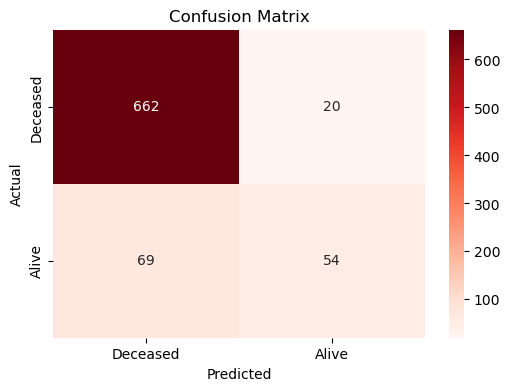

In [110]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Deceased', 'Alive'], yticklabels=['Deceased', 'Alive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SMOTE Application (for Class Imbalance)
If there is an imbalance between the classes of the target variable, I will increase the minority class using SMOTE (Synthetic Minority Oversampling Technique). This method allows the model to learn the minority class better.

In [114]:
print("Class Distribution before SMOTE:")
print("---------------------------------")
print(Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass Distribution after SMOTE:")
print("----------------------------------")
print(Counter(y_train_smote))

Class Distribution before SMOTE:
---------------------------------
Counter({0: 2726, 1: 493})

Class Distribution after SMOTE:
----------------------------------
Counter({0: 2726, 1: 2726})


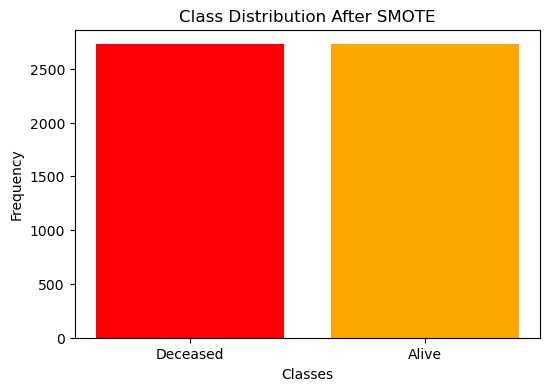

In [116]:
class_counts = Counter(y_train_smote)

plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=['red', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Deceased', 'Alive']) 
plt.show()

##### This visualization is a bar chart showing the class distribution in the dataset after applying the SMOTE (Synthetic Minority Oversampling Technique) method.
**Observations:**
- Impact of SMOTE
  - This graph clearly shows how the SMOTE method corrects class imbalance.
  - The dataset is organized in such a way that the model learns both classes in a balanced way.
- Solving the Classroom Imbalance Problem
  - In imbalanced data sets, the model usually favors the more dominant class. SMOTE addresses this problem by adding synthetic examples to the minority class.

## Training and Evaluation of the Decision Tree Model (After Applying SMOTE)

In [120]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model.fit(X_train_smote, y_train_smote)

print("Decision Tree Replay Model Trained!")

Decision Tree Replay Model Trained!


In [122]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance:")
print("-------------------")
print(f"- Accuracy: {accuracy:.2f}")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")
print(f"- F1 Score: {f1:.2f}")
print("------------------------------------------------------------------------------")

print("\nClassification Report:")
print("-------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------------------------------")

print("\nConfusion Matrix:")
print("----------------")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Model Performance:
-------------------
- Accuracy: 0.86
- Precision: 0.87
- Recall: 0.86
- F1 Score: 0.86
------------------------------------------------------------------------------

Classification Report:
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       682
           1       0.53      0.61      0.57       123

    accuracy                           0.86       805
   macro avg       0.73      0.76      0.74       805
weighted avg       0.87      0.86      0.86       805

------------------------------------------------------------------------------

Confusion Matrix:
----------------
[[616  66]
 [ 48  75]]


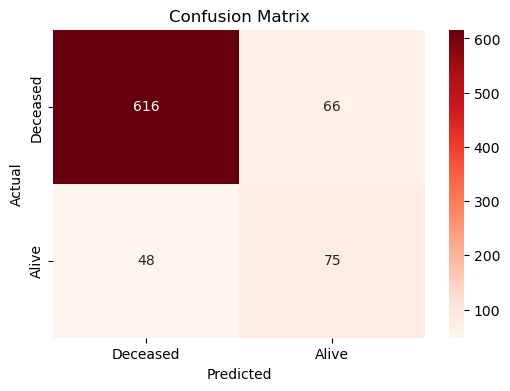

In [125]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Deceased', 'Alive'], yticklabels=['Deceased', 'Alive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

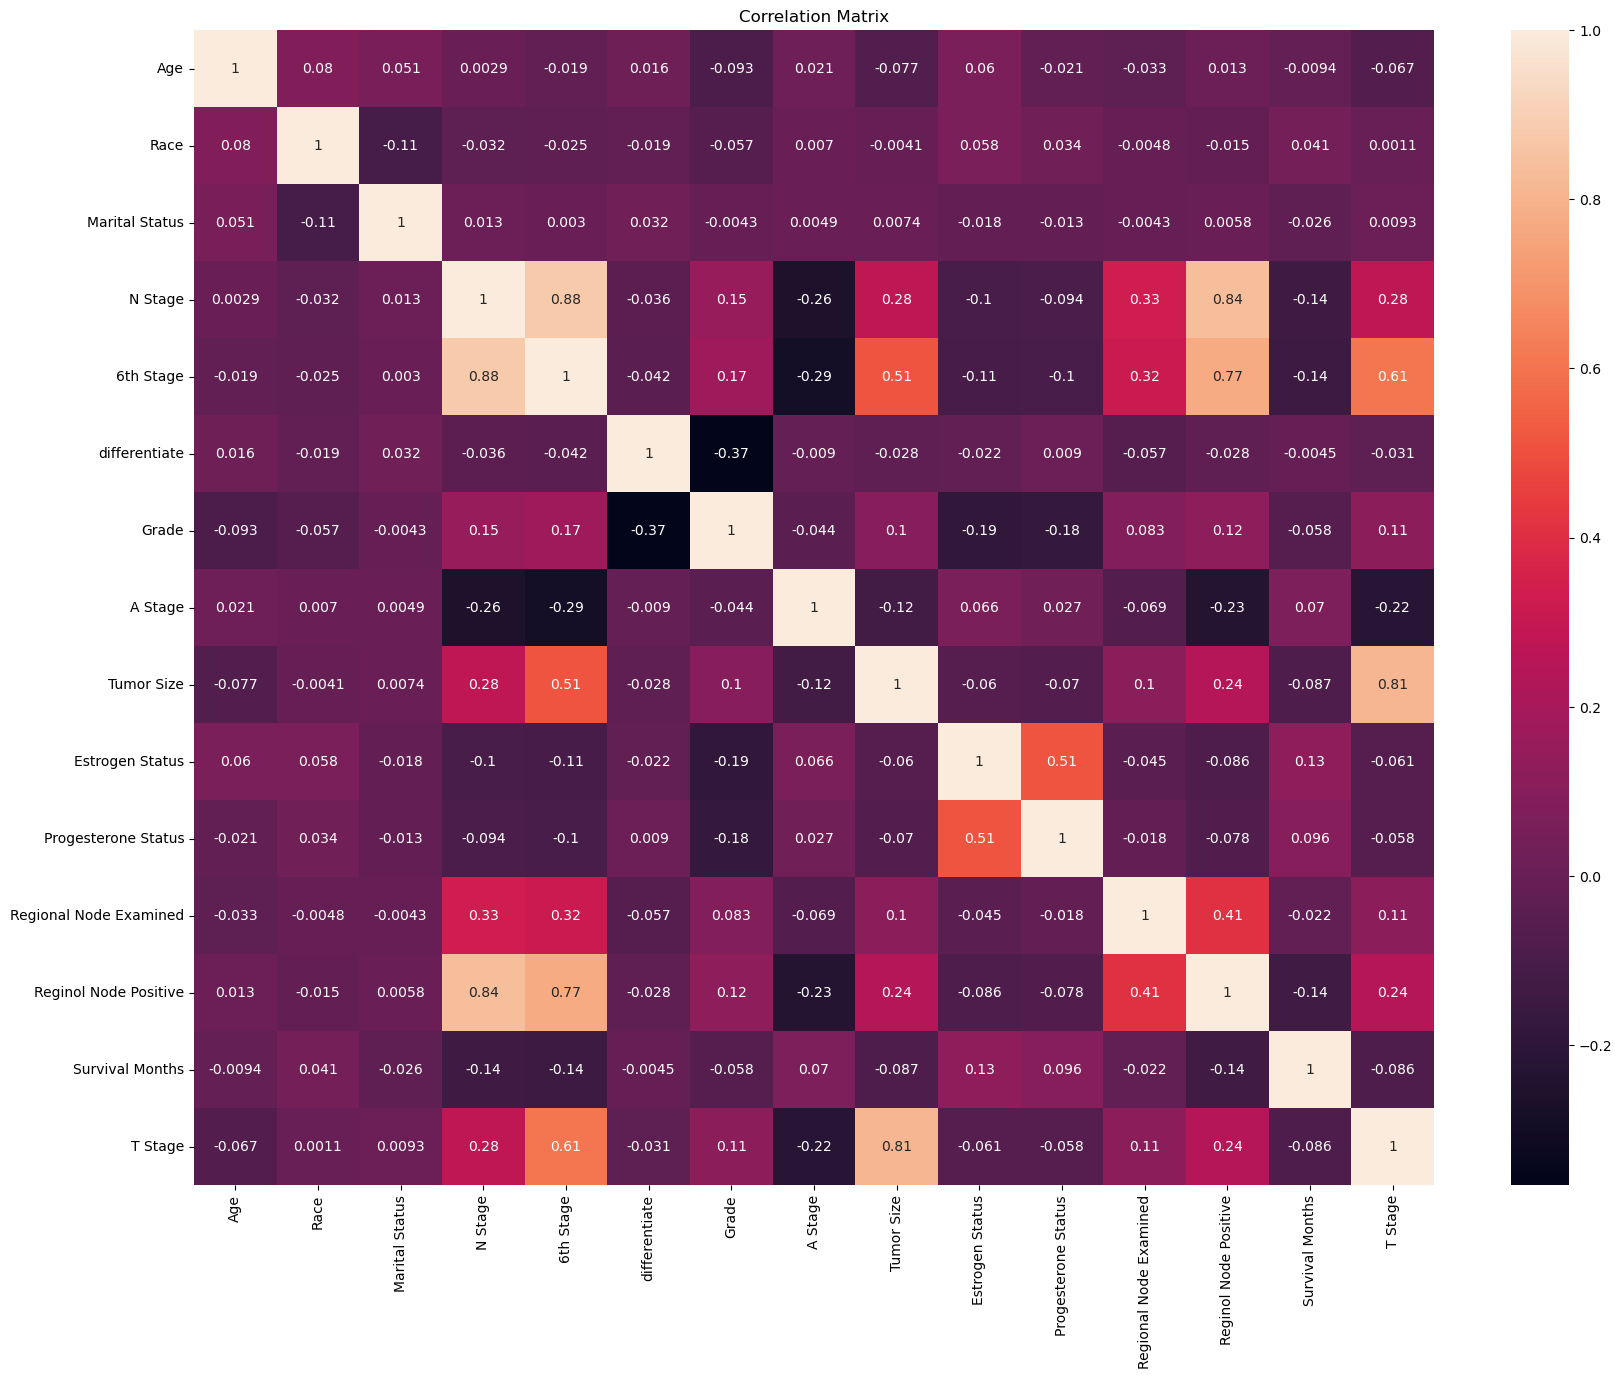

In [127]:
numeric_data = data.drop(columns=['Status'])

corr_matrix = numeric_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [130]:
columns_to_drop = ['N Stage', '6th Stage', 'Race', 'Marital Status', 'differentiate']

data_reduced = data.drop(columns=columns_to_drop)

print("Updated Data Set:")
print(data_reduced.head())

print("\nSize of the Updated Data Set:", data_reduced.shape)

Updated Data Set:
   Age  Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0   68      3        1           4                1                    1   
1   50      2        1          35                1                    1   
2   58      2        1          63                1                    1   
3   58      3        1          18                1                    1   
4   47      3        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  \
0                      24                      1               60       0   
1                      14                      5               62       0   
2                      14                      7               75       0   
3                       2                      1               84       0   
4                       3                      1               50       0   

   T Stage  
0        0  
1        1  
2        2  
3        0

## Perform splitting for testing after extracting data

In [134]:
X = data_reduced.drop('Status', axis=1) 
y = data_reduced['Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nExample 5 Rows from the Training Set (X_train):")
print("--------------------------------------------------")
print(X_train.head())
print("------------------------------------------------------------------------------")

print("\nTarget 5 Values from Training Set (y_train):")
print("-----------------------------------------------")
print(y_train.head())
print("------------------------------------------------------------------------------")

print("\nSample 5 Rows from Test Set (X_test):")
print("----------------------------------------")

print(X_test.head())
print("------------------------------------------------------------------------------")

print("\nTarget 5 Values from Test Set (y_test):")
print("------------------------------------------")
print(y_test.head())


Example 5 Rows from the Training Set (X_train):
--------------------------------------------------
      Age  Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
1909   50      1        1          40                1                    1   
1635   59      3        1          12                1                    1   
239    44      2        1          11                1                    1   
898    59      2        1          25                1                    0   
2679   69      1        1          18                1                    1   

      Regional Node Examined  Reginol Node Positive  Survival Months  T Stage  
1909                      13                      1               50        1  
1635                      11                      2               99        0  
239                        8                      2               77        0  
898                       32                      5              107        1  
2679                     

## SMOTE Application (After Data Extraction)

In [137]:
print("Class Distribution before SMOTE:")
print("---------------------------------")
print(Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass Distribution after SMOTE:")
print("----------------------------------")
print(Counter(y_train_smote))

Class Distribution before SMOTE:
---------------------------------
Counter({0: 2726, 1: 493})

Class Distribution after SMOTE:
----------------------------------
Counter({0: 2726, 1: 2726})


## Training and Evaluating the Decision Tree Model (After Data Extraction)

In [140]:

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model.fit(X_train_smote, y_train_smote)

print("Decision Tree Replay Model Trained!")

Decision Tree Replay Model Trained!


In [142]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance:")
print("-------------------")
print(f"- Accuracy: {accuracy:.2f}")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")
print(f"- F1 Score: {f1:.2f}")
print("------------------------------------------------------------------------------")

print("\nClassification Report:")
print("-------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------------------------------")

print("\nConfusion Matrix:")
print("----------------")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Model Performance:
-------------------
- Accuracy: 0.85
- Precision: 0.87
- Recall: 0.85
- F1 Score: 0.86
------------------------------------------------------------------------------

Classification Report:
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       682
           1       0.51      0.64      0.57       123

    accuracy                           0.85       805
   macro avg       0.72      0.77      0.74       805
weighted avg       0.87      0.85      0.86       805

------------------------------------------------------------------------------

Confusion Matrix:
----------------
[[607  75]
 [ 44  79]]


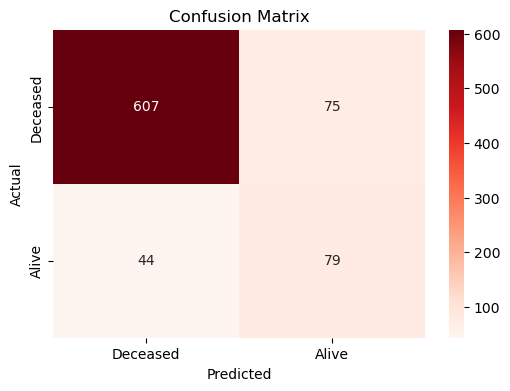

In [144]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Deceased', 'Alive'], yticklabels=['Deceased', 'Alive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [149]:
param_grid = {
    'max_depth': [3, 5, 10, 12, 16],
    'min_samples_split': [2, 5, 10, 11, 14],
    'criterion': ['gini', 'entropy'] 
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5,
    verbose=1, 
    n_jobs=-1 
)

grid_search.fit(X_train_smote, y_train_smote)

results = grid_search.cv_results_

print("\nGrid Search Results:")
print("-----------------------")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Parameters {params}, Average Accuracy: {mean_score:.4f}")

print("\nBest Parameters:")
print(grid_search.best_params_)

print(f"\nBest Accuracy Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Grid Search Results:
-----------------------
Parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}, Average Accuracy: 0.7913
Parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}, Average Accuracy: 0.7913
Parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}, Average Accuracy: 0.7913
Parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 11}, Average Accuracy: 0.7913
Parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 14}, Average Accuracy: 0.7913
Parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}, Average Accuracy: 0.7913
Parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}, Average Accuracy: 0.7913
Parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}, Average Accuracy: 0.7918
Parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 11}, Average Accuracy: 0.7

In [150]:
dt_model_hp = DecisionTreeClassifier(
    criterion='gini',
    max_depth=12,
    min_samples_split=2,
    random_state=42)

dt_model_hp.fit(X_train_smote, y_train_smote)

print("Decision Tree Replay Model Trained!")

y_pred = dt_model_hp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance:")
print("-------------------")
print(f"- Accuracy: {accuracy:.2f}")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")
print(f"- F1 Score: {f1:.2f}")
print("------------------------------------------------------------------------------")

print("\nClassification Report:")
print("-------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------------------------------")

print("\nConfusion Matrix:")
print("----------------")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Decision Tree Replay Model Trained!
Model Performance:
-------------------
- Accuracy: 0.80
- Precision: 0.84
- Recall: 0.80
- F1 Score: 0.82
------------------------------------------------------------------------------

Classification Report:
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       682
           1       0.40      0.58      0.47       123

    accuracy                           0.80       805
   macro avg       0.66      0.71      0.67       805
weighted avg       0.84      0.80      0.82       805

------------------------------------------------------------------------------

Confusion Matrix:
----------------
[[574 108]
 [ 52  71]]


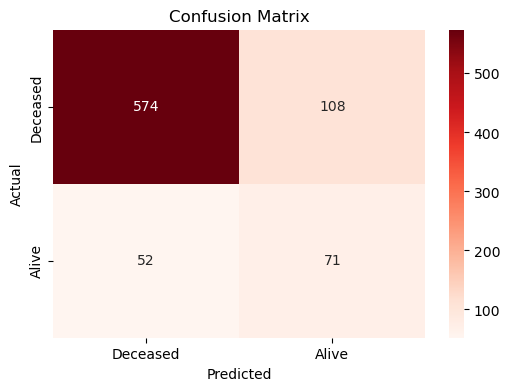

In [151]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Deceased', 'Alive'], yticklabels=['Deceased', 'Alive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree and Random Forest Comparison

In [157]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{model_name} Model Performance:")
    print("----------------------------")
    print(f"- Accuracy: {accuracy:.2f}")
    print(f"- Precision: {precision:.2f}")
    print(f"- Recall: {recall:.2f}")
    print(f"- F1 Score: {f1:.2f}")
    print("\n")

evaluate_model(y_test, y_pred_dt, "Decision Tree")

evaluate_model(y_test, y_pred_rf, "Random Forest")

print("\nDecision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Decision Tree Model Performance:
----------------------------
- Accuracy: 0.89
- Precision: 0.88
- Recall: 0.89
- F1 Score: 0.87


Random Forest Model Performance:
----------------------------
- Accuracy: 0.90
- Precision: 0.89
- Recall: 0.90
- F1 Score: 0.89



Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       682
           1       0.72      0.43      0.54       123

    accuracy                           0.89       805
   macro avg       0.81      0.70      0.74       805
weighted avg       0.88      0.89      0.87       805


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       682
           1       0.79      0.46      0.58       123

    accuracy                           0.90       805
   macro avg       0.85      0.72      0.76       805
weighted avg       0.89      0.90      0.89       805



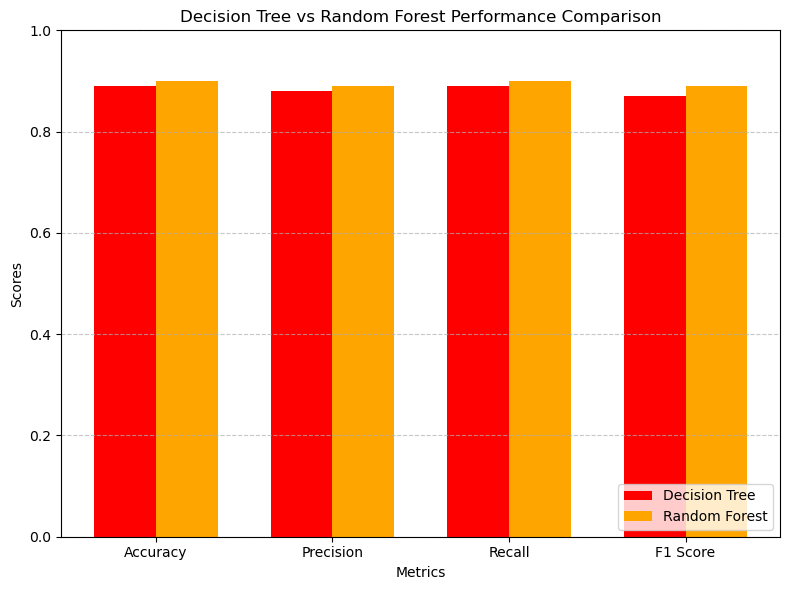

In [159]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Decision Tree and Random Forest performance results
dt_scores = [0.89, 0.88, 0.89, 0.87]  
rf_scores = [0.90, 0.89, 0.90, 0.89]  

x = np.arange(len(metrics))  

plt.figure(figsize=(8, 6))
bar_width = 0.35

# Decision Tree results
plt.bar(x - bar_width/2, dt_scores, bar_width, label='Decision Tree', color='red')

# Random Forest results
plt.bar(x + bar_width/2, rf_scores, bar_width, label='Random Forest', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Decision Tree vs Random Forest Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1)  
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## ROC Curve and AUC Score

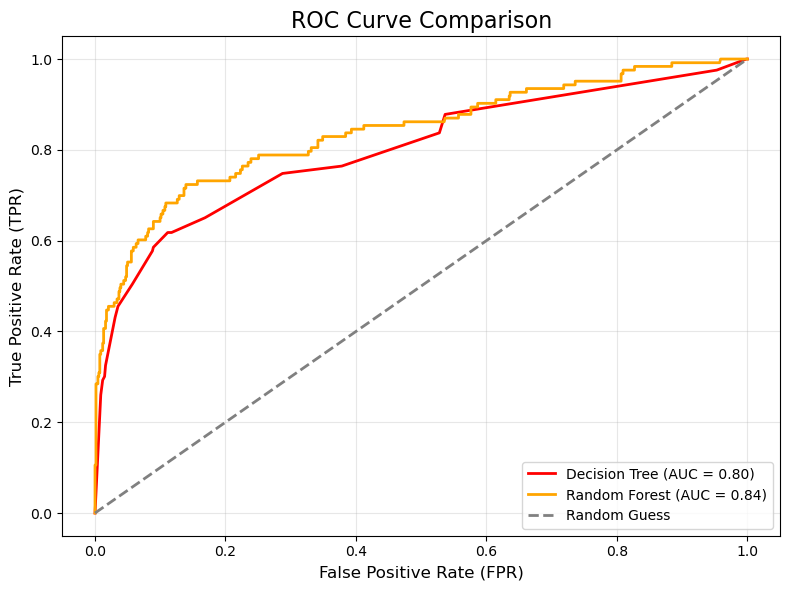

In [166]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1] 
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()